In [51]:
# Imports
from torch.utils.data import DataLoader, Dataset
import torchvision.transforms as T
import torchvision
import torch
import torch.nn as nn
from torchvision.utils import make_grid
from torchvision.utils import save_image
from IPython.display import Image
import matplotlib.pyplot as plt
import numpy as np
import os
import random
%matplotlib inline


In [52]:
# Actual Dataloader

base_path = "images/"
train_path = "train-small/"
test_path = "test/"
batch_size = 64

tranform_tensor = transform = T.Compose([
    # you can add other transformations in this list
    T.ToTensor(),
    T.RandomHorizontalFlip(p=0.5),
    T.RandomVerticalFlip(p=0.5),
    T.RandomAdjustSharpness(sharpness_factor=1.2, p=0.3)
])

tranform_j_tensor = transform = T.Compose([
    # you can add other transformations in this list
    T.ToTensor()
])

train_set = torchvision.datasets.ImageFolder(root=base_path + train_path, transform=tranform_tensor)
train_loader = torch.utils.data.DataLoader(dataset=train_set,
                                           batch_size=batch_size,
                                           shuffle=True)

test_set = torchvision.datasets.ImageFolder(root=base_path + test_path, transform=tranform_j_tensor)
test_loader = torch.utils.data.DataLoader(dataset=test_set,
                                           batch_size=batch_size,
                                           shuffle=False)




In [53]:
# Good Model Training

from model_2 import FakeNet2
from tqdm import tqdm


# initialize parameters
cnn = FakeNet2()
cnn.train()
iterations = 20
learning_rate = 0.001 

criterion = nn.BCELoss()
optimizer = torch.optim.Adam(cnn.parameters(), lr=learning_rate)

# Train the Model
for epoch in tqdm(range(iterations)):
    for i, (images, labels) in enumerate(train_loader):
        
        # Forward + Backward + Optimize
        optimizer.zero_grad()
        outputs = cnn(images)
        labels = labels.unsqueeze(1).float()
        loss = criterion(outputs,labels)
        loss.backward()
        optimizer.step()

        if (i+1)%31 == 0:
            print("Epoch " + str(epoch+1) + "/" + str(iterations) + str(loss.data))


  0%|          | 0/20 [00:00<?, ?it/s]

  5%|▌         | 1/20 [00:09<02:59,  9.42s/it]

Epoch 1/20tensor(0.4609)


 10%|█         | 2/20 [00:18<02:46,  9.24s/it]

Epoch 2/20tensor(0.4417)


 15%|█▌        | 3/20 [00:27<02:35,  9.14s/it]

Epoch 3/20tensor(0.2949)


 20%|██        | 4/20 [00:35<02:24,  9.04s/it]

Epoch 4/20tensor(0.4555)


 25%|██▌       | 5/20 [00:44<02:14,  8.97s/it]

Epoch 5/20tensor(0.1768)


 30%|███       | 6/20 [00:53<02:04,  8.91s/it]

Epoch 6/20tensor(0.3138)


 35%|███▌      | 7/20 [01:02<01:55,  8.91s/it]

Epoch 7/20tensor(0.1693)


 40%|████      | 8/20 [01:11<01:46,  8.90s/it]

Epoch 8/20tensor(0.2335)


 45%|████▌     | 9/20 [01:20<01:37,  8.88s/it]

Epoch 9/20tensor(0.2362)


 50%|█████     | 10/20 [01:29<01:28,  8.90s/it]

Epoch 10/20tensor(0.2727)


 55%|█████▌    | 11/20 [01:37<01:19,  8.85s/it]

Epoch 11/20tensor(0.0714)


 60%|██████    | 12/20 [01:46<01:10,  8.83s/it]

Epoch 12/20tensor(0.2230)


 65%|██████▌   | 13/20 [01:55<01:02,  8.87s/it]

Epoch 13/20tensor(0.0432)


 70%|███████   | 14/20 [02:04<00:53,  8.84s/it]

Epoch 14/20tensor(0.1385)


 75%|███████▌  | 15/20 [02:13<00:44,  8.82s/it]

Epoch 15/20tensor(0.1554)


 80%|████████  | 16/20 [02:21<00:35,  8.80s/it]

Epoch 16/20tensor(0.1622)


 85%|████████▌ | 17/20 [02:30<00:26,  8.79s/it]

Epoch 17/20tensor(0.0776)


 90%|█████████ | 18/20 [02:39<00:17,  8.78s/it]

Epoch 18/20tensor(0.1030)


 95%|█████████▌| 19/20 [02:48<00:08,  8.81s/it]

Epoch 19/20tensor(0.1135)


100%|██████████| 20/20 [02:57<00:00,  8.85s/it]

Epoch 20/20tensor(0.2086)


In [54]:
# # NEW MODELS

# from model import FakeNet
# from tqdm import tqdm



# # initialize parameters
# cnn = FakeNet()
# cnn.train()
# iterations = 20
# learning_rate = 0.001 

# criterion = nn.BCELoss()
# optimizer = torch.optim.Adam(cnn.parameters(), lr=learning_rate)

# # Train the Model
# for epoch in tqdm(range(iterations)):
#     for i, (images, labels) in enumerate(train_loader):
        
#         # Forward + Backward + Optimize
#         optimizer.zero_grad()
#         outputs = cnn(images)
#         labels = labels.unsqueeze(1).float()
#         loss = criterion(outputs,labels)
#         loss.backward()
#         optimizer.step()

#         if (i+1)%31 == 0:
#             print("Epoch " + str(epoch+1) + "/" + str(iterations) + str(loss.data))

In [55]:
# Model Evaluation

cnn.eval()  # Change model to 'eval' mode (BN uses moving mean/var)
correct = 0
total = 0

for images, labels in test_loader:
    outputs = cnn(images)
    predicted = torch.round(outputs.data)
    total += labels.size(0)
    correct += (predicted.numpy().T == np.array(labels)).sum()
    if total % 256 == 0:
        print("Correct: ", correct, ", Total: ", total)
        
print('Test Accuracy of the model on test images: %.6f%%' % (100.0*correct/total))


Correct:  238 , Total:  256
Correct:  461 , Total:  512
Correct:  697 , Total:  768
Correct:  929 , Total:  1024
Correct:  1159 , Total:  1280
Correct:  1396 , Total:  1536
Correct:  1622 , Total:  1792
Correct:  1859 , Total:  2048
Correct:  2091 , Total:  2304
Correct:  2331 , Total:  2560
Correct:  2565 , Total:  2816
Correct:  2796 , Total:  3072
Correct:  3036 , Total:  3328
Correct:  3265 , Total:  3584
Correct:  3504 , Total:  3840
Correct:  3737 , Total:  4096
Correct:  3981 , Total:  4352
Correct:  4220 , Total:  4608
Correct:  4455 , Total:  4864
Correct:  4689 , Total:  5120
Correct:  4924 , Total:  5376
Correct:  5163 , Total:  5632
Correct:  5400 , Total:  5888
Correct:  5633 , Total:  6144
Correct:  5873 , Total:  6400
Correct:  6105 , Total:  6656
Correct:  6342 , Total:  6912
Correct:  6575 , Total:  7168
Correct:  6804 , Total:  7424
Correct:  7040 , Total:  7680
Correct:  7279 , Total:  7936
Correct:  7515 , Total:  8192
Correct:  7755 , Total:  8448
Correct:  7990 , 

In [56]:
# Loads data for trying the model on an image

list_tl = list(test_loader)

image_size = 32

path_real = 'images/test/REAL/'
img_names_real = os.listdir(path_real)

path_fake = 'images/test/FAKE/'
img_names_fake = os.listdir(path_fake)

batch_size = 10000


X_test_real = []
X_test_fake = []
for i in range(batch_size):
    name_real = img_names_real[i]
    img_name = path_real + name_real
    image = plt.imread(img_name)
    X_test_real.append(image)

    name_fake = img_names_fake[i]
    img_name = path_fake + name_fake
    image = plt.imread(img_name)
    X_test_fake.append(image)

test_imgs = X_test_real + X_test_fake
test_imgs = np.array(test_imgs)
print(f"Shape of training data: {test_imgs.shape}")
print(f"Data type: {type(test_imgs)}")


Shape of training data: (20000, 32, 32, 3)
Data type: <class 'numpy.ndarray'>


Text(0.5, 1.0, 'Actual Label: Fake\nPredicted Label: Fake\nImage Number: 13744')

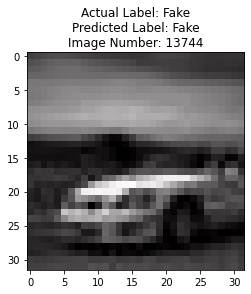

In [57]:
# This is where you test the model on images. The commented indices depending on model should fail
# in different ways to predict correctly
# Only works on the original training set in current configuration

img_index = np.random.randint(10000, len(test_set))
# img_index = 4894
# img_index = 10755
real_label = "Real" if img_index < 10000 else "Fake"
predicted_label = torch.round(cnn(list_tl[img_index // 64][0]))[img_index % 64].detach().numpy()[0]
predicted_label = "Real" if predicted_label < 0.5 else "Fake"

plt.imshow(test_imgs[img_index])
plt.title("Actual Label: " + real_label + "\nPredicted Label: "
          + predicted_label + "\nImage Number: " + str(img_index))


In [58]:
# This is to set up image viewing

image_size = 32

path_real = 'images/train/REAL/'
img_names_real = os.listdir(path_real)

path_fake = 'images/train/FAKE/'
img_names_fake = os.listdir(path_fake)

batch_size = 1000


X_train_real = []
X_train_fake = []
for i in range(batch_size):
    name_real = img_names_real[i]
    img_name = path_real + name_real
    image = plt.imread(img_name)
    X_train_real.append(image)

    name_fake = img_names_fake[i]
    img_name = path_fake + name_fake
    image = plt.imread(img_name)
    X_train_fake.append(image)

X_train_real = np.array(X_train_real)
X_train_fake = np.array(X_train_fake)
print(f"Shape of training data: {X_train_real.shape}")
print(f"Data type: {type(X_train_real)}")

Shape of training data: (1000, 32, 32, 3)
Data type: <class 'numpy.ndarray'>


Text(0.5, 1.0, 'Image Number Fake: 272')

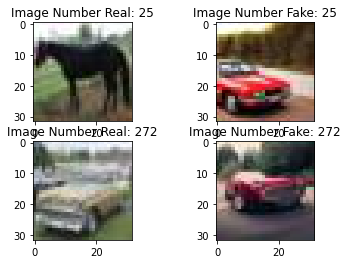

In [59]:
# This is to actually show some images


img_index = np.random.randint(0, batch_size)
img_2_index = np.random.randint(0, batch_size)


figure, axis = plt.subplots(2, 2) 

axis[0, 0].imshow(X_train_real[img_index], interpolation='nearest')
axis[0, 0].set_title("Image Number Real: " + str(img_index)) 
  
axis[0, 1].imshow(X_train_fake[img_index], interpolation='nearest')
axis[0, 1].set_title("Image Number Fake: " + str(img_index)) 
  
axis[1, 0].imshow(X_train_real[img_2_index], interpolation='nearest')
axis[1, 0].set_title("Image Number Real: " + str(img_2_index)) 
  
axis[1, 1].imshow(X_train_fake[img_2_index], interpolation='nearest')
axis[1, 1].set_title("Image Number Fake: " + str(img_2_index)) 
